In [ ]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython

CONSUMER_KEY = "VhTciYVvg3vPX3o0ZvRgrvaHk"
CONSUMER_SECRET = "NZykhALpdyIUBmFapooqcbqhNwD91F6wfF4hom7ss6nFbDZwVX"
OAUTH_TOKEN = "772697867148464128-BOjXTIb2lmpGjhZ5PQXv19AR5IcGHdc"
OAUTH_TOKEN_SECRET = "bdeeEMWNSmjGhYtIReqfNUWLa77U4rCLcW2OedA4I7DBi"

twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweets = []
MAX_ATTEMPTS = 40
COUNT_OF_TWEETS_TO_BE_FETCHED = 3800 

for i in range(0,MAX_ATTEMPTS):

    if(COUNT_OF_TWEETS_TO_BE_FETCHED < len(tweets)):
        print("We Got ", len(tweets), " tweets!!!")
        break # we got the  tweets... !!

    # STEP 1: Query Twitter
    if(0 == i):
        # Query twitter for data. 
        results = twitter.search(q="κορωνοϊός",count='100')
        print("I Got:", len(results['statuses']), " tweets")
    else:
        # After the first call we should have max_id from result of previous call. Pass it in query.
        results = twitter.search(q="κορωνοϊός",count='100', include_entities='true',max_id=next_max_id)
        print("I Got:", len(results['statuses']), " tweets")


    # STEP 2: Save the returned tweets
    for result in results['statuses']:
#        tweet_text = result['text']
        tweets.append(result)


    # STEP 3: Get the next max_id
    try:
        # Parse the data returned to get max_id to be passed in consequent call.
        next_results_url_params = results['search_metadata']['next_results']
        next_max_id = next_results_url_params.split('max_id=')[1].split('&')[0]
    except:
        # No more next pages
        break

I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
We Got  3900  tweets!!!


In [ ]:
df = pd.DataFrame(tweets)

In [ ]:
df.head()

created_at  ...  quoted_status
0  Sat Jul 10 07:30:10 +0000 2021  ...            NaN
1  Sat Jul 10 07:30:06 +0000 2021  ...            NaN
2  Sat Jul 10 07:28:18 +0000 2021  ...            NaN
3  Sat Jul 10 07:26:39 +0000 2021  ...            NaN
4  Sat Jul 10 07:24:44 +0000 2021  ...            NaN

[5 rows x 30 columns]

In [ ]:
df.shape

(3900, 30)

In [ ]:
df = df[['created_at','text','retweet_count','favorite_count']]
df.head()


created_at  ... favorite_count
0  Sat Jul 10 07:30:10 +0000 2021  ...              0
1  Sat Jul 10 07:30:06 +0000 2021  ...              0
2  Sat Jul 10 07:28:18 +0000 2021  ...              0
3  Sat Jul 10 07:26:39 +0000 2021  ...              0
4  Sat Jul 10 07:24:44 +0000 2021  ...              1

[5 rows x 4 columns]

In [ ]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

created_at  ... favorite_count
0     Sat Jul 10 07:30:10 +0000 2021  ...              0
1     Sat Jul 10 07:30:06 +0000 2021  ...              0
2     Sat Jul 10 07:28:18 +0000 2021  ...              0
3     Sat Jul 10 07:26:39 +0000 2021  ...              0
4     Sat Jul 10 07:24:44 +0000 2021  ...              1
...                              ...  ...            ...
3895  Tue Jul 06 22:18:27 +0000 2021  ...              0
3896  Tue Jul 06 22:17:58 +0000 2021  ...              0
3897  Tue Jul 06 22:16:53 +0000 2021  ...              0
3898  Tue Jul 06 22:16:28 +0000 2021  ...              0
3899  Tue Jul 06 22:16:05 +0000 2021  ...              0

[3892 rows x 4 columns]

In [ ]:
df['created_at'] =  pd.to_datetime(df['created_at'], dayfirst=True) #.dt.strftime('%d/%m/%Y') 


In [ ]:
df['year'] = pd.DatetimeIndex(df['created_at']).year
df['day'] = pd.DatetimeIndex(df['created_at']).day
df['month'] = pd.DatetimeIndex(df['created_at']).month

In [ ]:
df.dtypes

created_at        datetime64[ns, UTC]
text                           object
retweet_count                   int64
favorite_count                  int64
year                            int64
day                             int64
month                           int64
dtype: object

In [ ]:
df.dropna()

created_at  ... month
0    2021-07-10 07:30:10+00:00  ...     7
1    2021-07-10 07:30:06+00:00  ...     7
2    2021-07-10 07:28:18+00:00  ...     7
3    2021-07-10 07:26:39+00:00  ...     7
4    2021-07-10 07:24:44+00:00  ...     7
...                        ...  ...   ...
3895 2021-07-06 22:18:27+00:00  ...     7
3896 2021-07-06 22:17:58+00:00  ...     7
3897 2021-07-06 22:16:53+00:00  ...     7
3898 2021-07-06 22:16:28+00:00  ...     7
3899 2021-07-06 22:16:05+00:00  ...     7

[3900 rows x 7 columns]

In [ ]:
df = df.rename(columns={'created_at': 'date','retweet_count': 'retweets','favorite_count': 'favorites'})

In [ ]:
df['text'] = df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [ ]:
df['text'] = df['text'].str.lower()


In [ ]:
df.to_csv("tweets_covid", index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/tweets_covid.csv", sep='\t')

------------

In [ ]:
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
#!python -m spacy download el_core_news_sm


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['τέτοιας',
 'εαυτού',
 'κανένα',
 'έτερους',
 'ως',
 'καλώς',
 'μήτε',
 'καμίαν',
 'ποιών',
 'τούτα',
 'εκείνο',
 'έκαστο',
 'άλλη',
 'συγχρόνως',
 'έχοντας',
 'ετούτοι',
 'επάνω',
 'εκάστους',
 'καμίας',
 'αυτήν']

In [ ]:
text = df['text'].str.cat(sep = ' ')

In [ ]:
doc = nlp(df['text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

το το
ρεκόρ ρεκόρ
θανάτων θανάτο
γιατρών γιατρός
στην στην
# #
ινδονησία ινδονησίο
καταγράφηκε καταγράφηκε
τον τον
ιανουάριο ιανουάριο
, ,
όταν όταν
είχαν έχω
υποκύψει υποκύψω
65 65

  
 


In [ ]:
' '.join(token.lemma_ for token in doc)

'το ρεκόρ θανάτο γιατρός στην # ινδονησίο καταγράφηκε τον ιανουάριο , όταν έχω υποκύψω 65 \n '

In [ ]:
full_doc = nlp(text)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

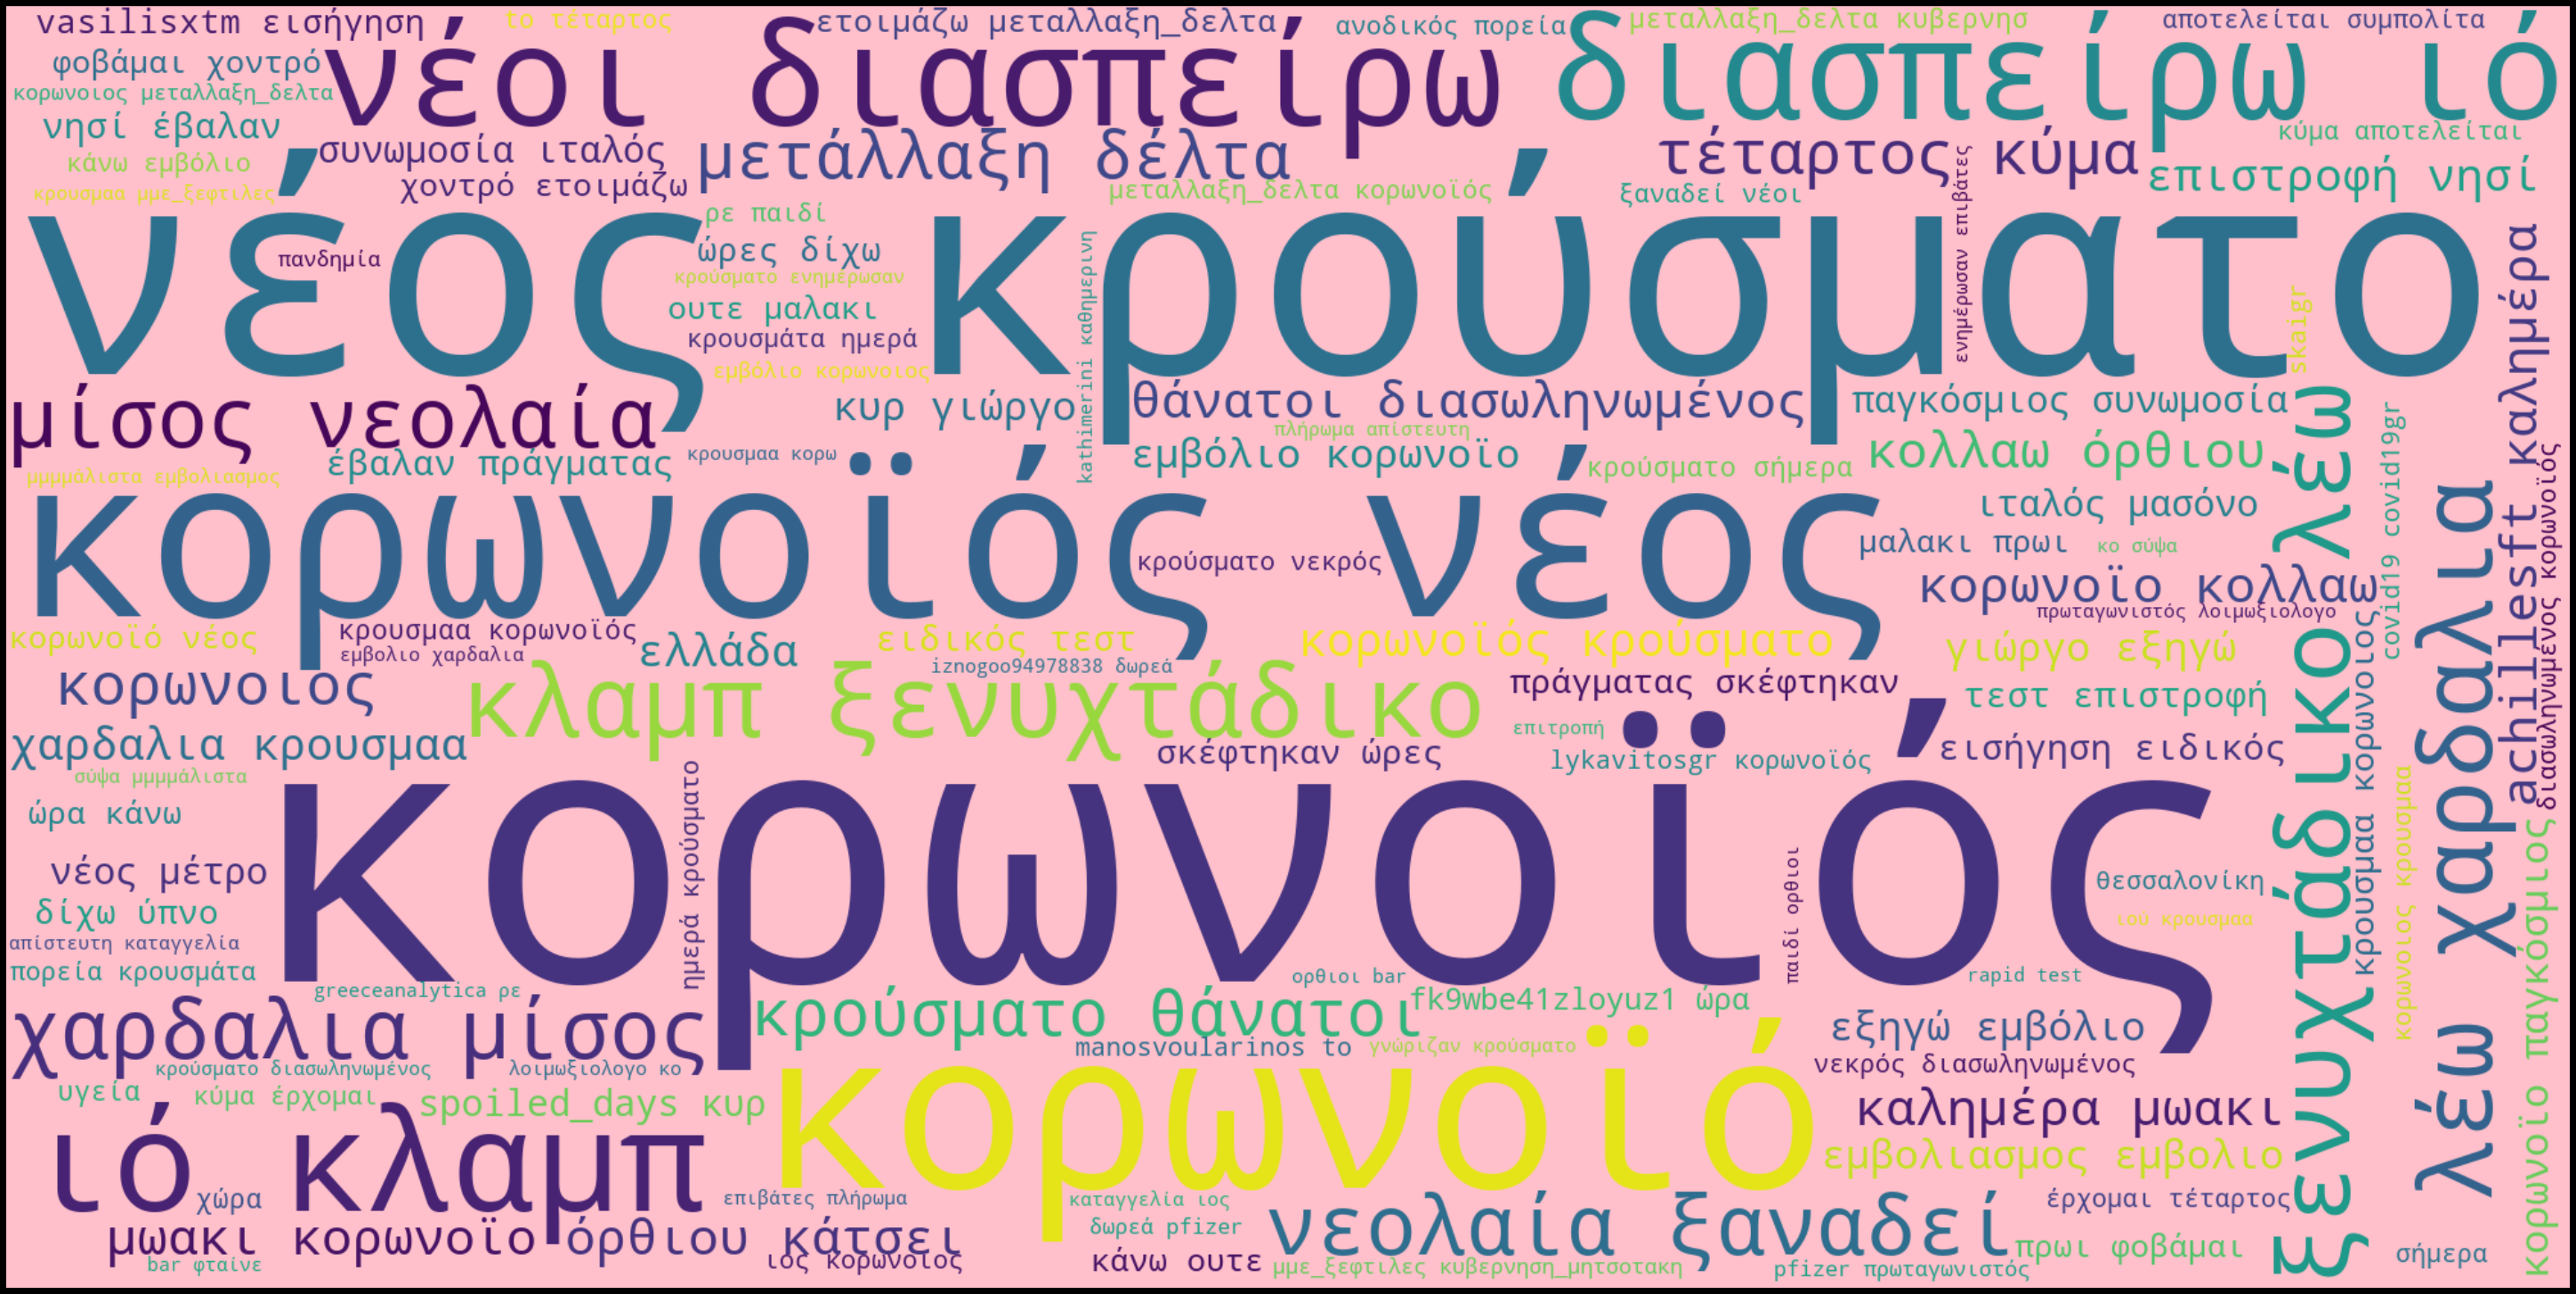

In [ ]:
wordcloud = WordCloud(
    max_words = 120,
    stopwords = ["article_end","googletag.cmd.push(function() {\ngoogletag.display","καδ",'rt','tsitiri','marka149133376'] + list(nlp.Defaults.stop_words),
    width = 2000,
    height = 1000,
    background_color = 'pink'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

--------------

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(df['text'])

In [ ]:
count_vector.shape

(3900, 5771)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

00  000  018  021  022  026  04  ...  ύψη  ύψους  ώρα  ώρας  ώρες  ώς  ώστε
0   0    0    0    0    0    0   0  ...    0      0    0     0     0   0     0
1   0    0    0    0    0    0   0  ...    0      0    0     0     0   0     0
2   0    0    0    0    0    0   0  ...    0      0    0     0     0   0     0
3   0    0    0    0    0    0   0  ...    0      0    0     0     0   0     0
4   0    0    0    0    0    0   0  ...    0      0    0     0     0   0     0

[5 rows x 5771 columns]

In [ ]:
cv = CountVectorizer(stop_words=["article_end","googletag.cmd.push(function() {\ngoogletag.display", 'RT'] + list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(df['text'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cmd', 'display', 'function', 'googletag', 'push', 'rt'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()


000  10  107  12  141  153  ...  χώρα  χώρους  όρθιους  ύπνο  ώρα  ώρες
0    0   0    0   0    0    0  ...     0       0        0     0    0     0
1    0   0    0   0    0    0  ...     0       0        0     0    0     0
2    0   0    0   0    0    0  ...     0       0        0     0    0     0
3    0   0    0   0    0    0  ...     0       0        0     0    0     0
4    0   0    0   0    0    0  ...     0       0        0     0    0     0

[5 rows x 138 columns]

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer( stop_words= ['RT','rt',"article_end","googletag.cmd.push(function() {\ngoogletag.display","cmd","display","embed","function","googletag","push","ευρώ","2020","δις","000","σύμφωνα","δισ","2021","10","30","εκατ","μέτρων","εργαζομένων","επιχειρήσεων","2019","20","50,""αφορά","μήνα",'κορωνοιος'] + list(nlp.Defaults.stop_words), max_features=20) #,tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(df['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['50', 'αφορά'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


marka149133376  διασπείρουν  διασωληνωμένοι  ...  ξαναδεί  ξενυχτάδικα  χαρδαλιας
0               0            0               0  ...        0            0          0
1               0            0               0  ...        0            0          0
2               0            0               0  ...        0            0          0
3               0            0               0  ...        0            0          0
4               0            0               0  ...        0            0          0

[5 rows x 20 columns]

In [ ]:
common_words =  results.sum(axis =0)
common_words.sort_values(ascending = False).head(10)

κορωνοϊός         1722
κρούσματα          795
νέα                452
κρουσματα          304
χαρδαλιας          281
νέοι               247
λέει               236
διασωληνωμένοι     235
θάνατοι            233
ιό                 228
dtype: int64

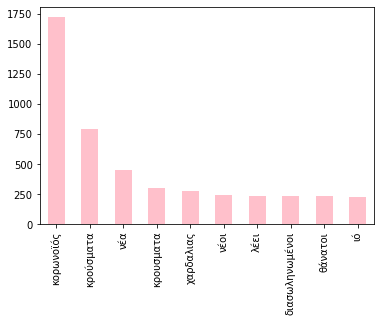

In [ ]:
c = common_words.sort_values(ascending = False).head(10).plot(kind='bar', color='pink')

In [ ]:
cv = CountVectorizer( stop_words= ['rt','177',"article_end","googletag.cmd.push(function() {\ngoogletag.display","cmd","display","embed","function","googletag","push","app", "mycountrytalks",	"covid 19",	"data", "was",	"document","getelementbyid","getelementbyid","mycountrytalks",	"if", "wasresized",	"message", "evt",	"newscrolltop", "var",	"sars", "cov",	"scrollto", "newscrolltop",	"scrolltop", "document","var","additionalsafespace",	"currentscrolltop","ευρώ","υπουργείου","προκαταβολή"]+list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2)) #,tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['text'])
results2 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results2.head()


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['19', 'covid'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


107 νέα  159 διασωληνωμένοι  ...  χαρδαλιας μίσος  όρθιους κάτσεις
0        0                   0  ...                0                0
1        0                   0  ...                0                0
2        0                   0  ...                0                0
3        0                   0  ...                0                0
4        0                   0  ...                0                0

[5 rows x 20 columns]

In [ ]:
sum_words =  results2.sum(axis =0)
sum_words.sort_values(ascending = False).head()

νέα κρούσματα       330
ιό κλαμπ            186
ξενυχτάδικα λέει    186
νεολαία ξαναδεί     186
νέοι διασπείρουν    186
dtype: int64

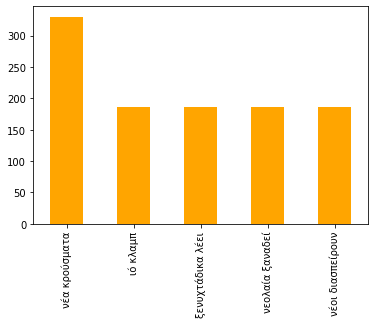

In [ ]:
sum_words.sort_values(ascending = False).head(5).plot(kind='bar', color='orange')

-----------

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
CountVectorizer(stop_words= ['rt',"article_end","googletag.cmd.push(function() {\ngoogletag.display"] + list(nlp.Defaults.stop_words), binary=True)

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(df['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [ ]:
#λίστα με angry words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

#λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

#λίστα με sad words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

#λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

#λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

#λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

#λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

#λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

#λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

#λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)




In [ ]:
df.set_index('date' , inplace=True)

In [ ]:
df.index = pd.to_datetime(df.index)


In [ ]:
df['A'] = df.index.year
df['B'] = df.index.month
df['C'] = df.index.day

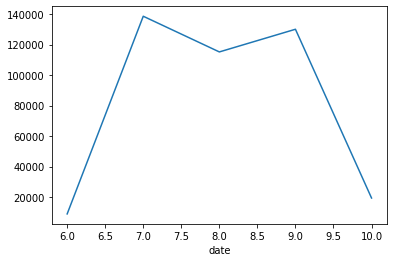

In [ ]:
df['text'].str.len().groupby(by=df.index.day).sum().plot() 

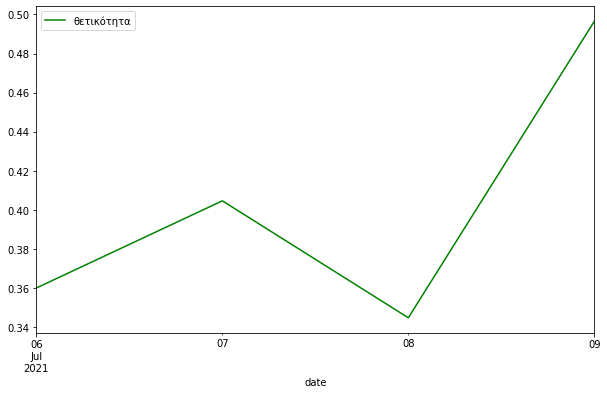

In [ ]:
df['positivity'].resample('C').mean().plot(color = 'green',label = 'θετικότητα',figsize=(10, 6)).legend()

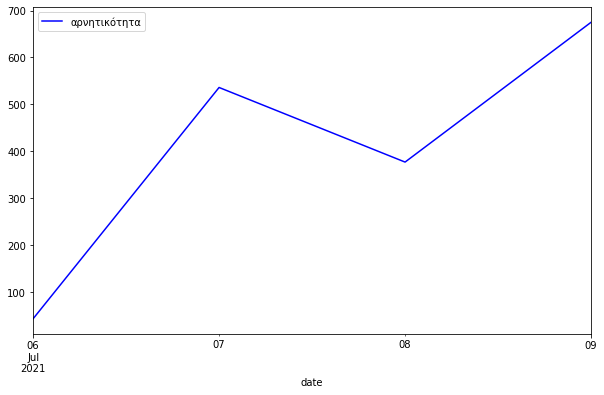

In [ ]:
df['negative'].resample('C').sum().plot(color = 'b',label = 'αρνητικότητα',figsize=(10, 6)).legend() 

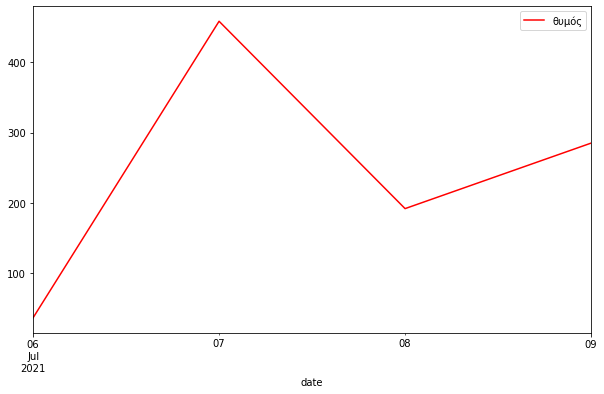

In [ ]:
df['anger'].resample('C').sum().plot(color = 'red',label = 'θυμός',figsize=(10, 6)).legend() 

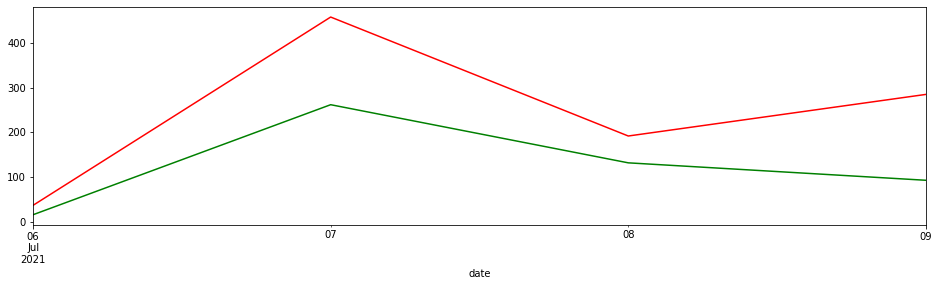

In [ ]:
ax = df['anger'].resample('C').sum().plot(figsize=(16,4), color = 'red')
df['joy'].resample('C').sum().plot(figsize=(16,4), ax = ax, color = 'green')

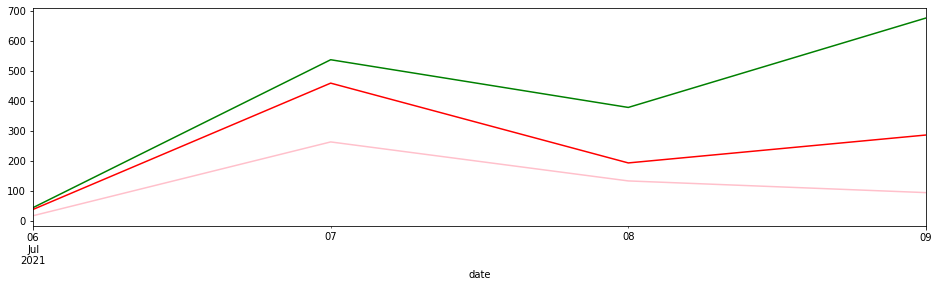

In [ ]:
ax = df['joy'].resample('C').sum().plot(figsize=(16,4), label = 'χαρά', color = 'pink')
df['negative'].resample('C').sum().plot(figsize=(16,4),label = 'αρνητικότητα', ax = ax, color = 'green')
df['anger'].resample('C').sum().plot(figsize=(16,4), label = 'θυμός',ax = ax, color = 'red')

-----------

In [ ]:
rt1 = df.sort_values(by='retweets',ascending=False)

In [ ]:
rt1['text'][0]

'rt @marka149133376: #μητσοτακης και κορωνοιος.\nη θρυλική απάντηση της γιαγιάς γράφει ιστορία 🤣😂🤣😂  '

In [ ]:
fav1 = df.sort_values(by='favorites',ascending=False)

In [ ]:
fav1['text'][0]

'10 η ώρα και δεν έχουν κάνει ουτε μια μαλακια απ το πρωι, φοβάμαι, κάτι χοντρό ετοιμάζουν...#μεταλλαξη_δελτα…  '

In [ ]:
df.sort_values(by='favorites',ascending=False)

text  ...  C
date                                                                          ...   
2021-07-09 07:13:12+00:00  10 η ώρα και δεν έχουν κάνει ουτε μια μαλακια ...  ...  9
2021-07-08 13:28:14+00:00  εισήγηση ειδικών για τεστ και κατά την επιστρο...  ...  8
2021-07-09 08:28:25+00:00  ποσο μπροστα ηταν ρε ο asterix!!\n#κρουσματα #...  ...  9
2021-07-08 05:22:48+00:00  καλημέρα μωακι, ο κορωνοϊος κολλαει μόνο τους ...  ...  8
2021-07-09 07:08:58+00:00  η κυβέρνηση και η αντιπολίτευση τους γύρισαν τ...  ...  9
...                                                                      ...  ... ..
2021-07-08 22:39:13+00:00  rt @agrinio24gr: κορωνοϊός: πρόστιμα ύψους 52....  ...  8
2021-07-08 22:38:29+00:00  κορωνοϊός - οι ειδικοί προειδοποιούν: είμαστε ...  ...  8
2021-07-08 22:38:12+00:00  rt @wearethenewsgr: #κυβερνηση_συμμορια #κυβερ...  ...  8
2021-07-08 22:37:54+00:00  rt @thod_iliopoulos: μία ακόμα απάντηση στους ...  ...  8
2021-07-06 22:16:05+00:00  @tyraniavapirel και συ στριμωξου στον άλιμο κι...  ...  6

[3900 rows x 19 columns]